In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
df1= pd.read_csv("delivery_time.csv")

In [3]:
df1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df1.shape

(21, 2)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df2= df1.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'}, inplace=False)


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


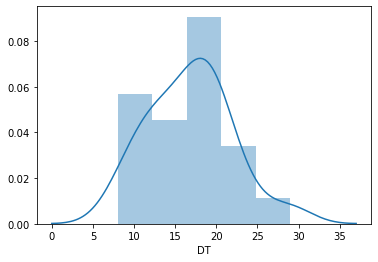

In [8]:
sns.distplot(df2['DT'])

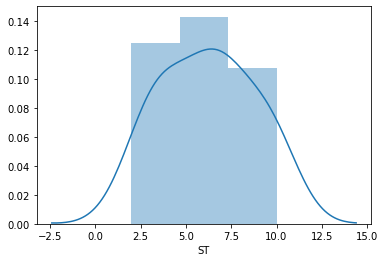

In [9]:
sns.distplot(df2['ST'])

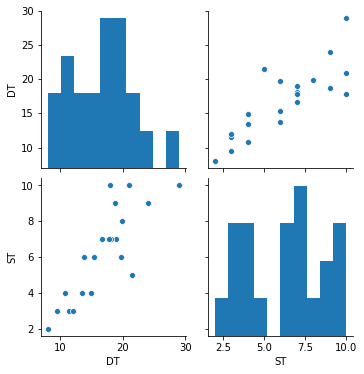

In [10]:
sns.pairplot(df2)

In [11]:
print(skew(df2.DT))
print(skew(df2.ST))

0.326702631656106
0.043680994983108075


In [12]:
print(kurtosis(df2.DT))
print(kurtosis(df2.ST))

-0.02558576894549036
-1.1653901357029155


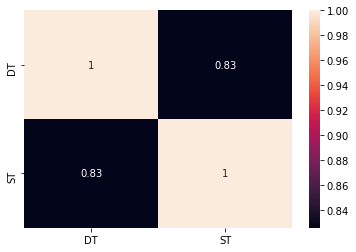

In [13]:
df_corr=df2.corr()

sns.heatmap(df_corr, annot=True)
plt.show()

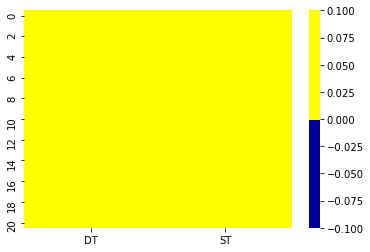

In [14]:
col= df2.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df2[col].isnull(),
            cmap=sns.color_palette(colours))

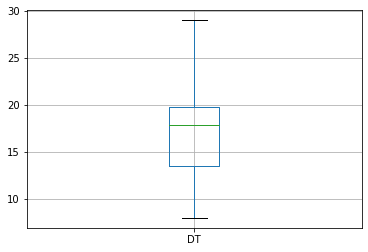

In [15]:
df2.boxplot(column=['DT'])

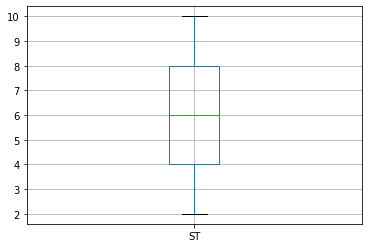

In [16]:
df2.boxplot(column=['ST'])

In [17]:
df2[df2.duplicated()].shape

(0, 2)

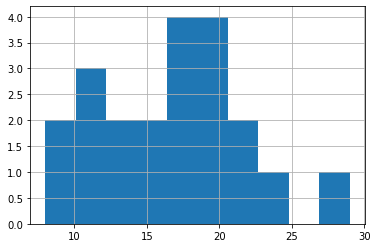

In [18]:
df2.DT.hist()

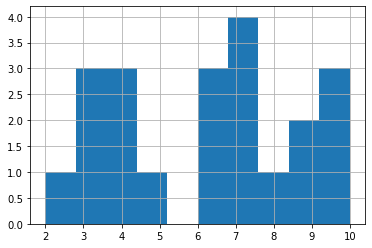

In [19]:
df2.ST.hist()

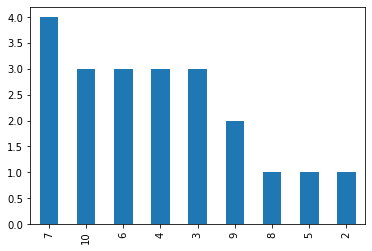

In [20]:
df2['ST'].value_counts().plot.bar()

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model= smf.ols('DT~ST',data=df2).fit()

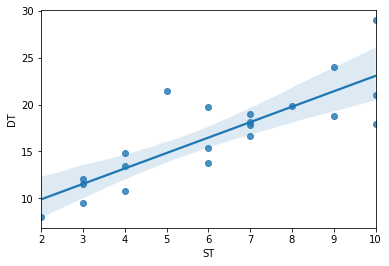

In [22]:
sns.regplot(x='ST',y='DT', data= df2)
plt.show()

In [23]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [24]:
print(model.tvalues,model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 Intercept    0.001147
ST           0.000004
dtype: float64


In [25]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           3.98e-06
Time:                        13:05:57   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

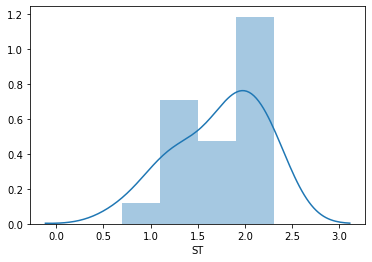

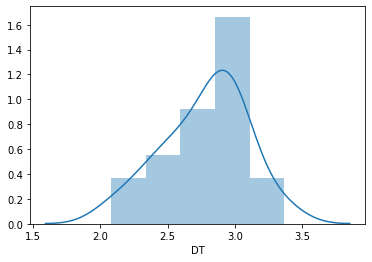

In [27]:
data= df2
data['ST']=np.log(data['ST'])
sns.distplot(data['ST'])
plt.show()
data['DT']= np.log(data['DT'])
sns.distplot(data['DT'])
plt.show()

In [28]:
model2= smf.ols('ST~DT',data=data).fit()

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           1.60e-07
Time:                        13:05:58   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
DT             1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

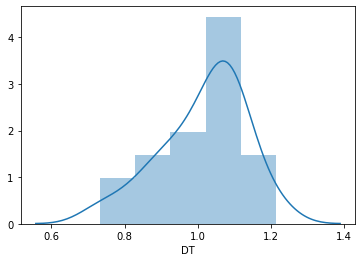

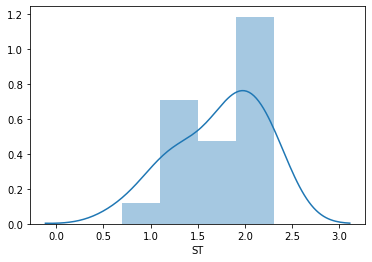

In [30]:
data1= data
data1['DT']=np.log(data1['DT'])
sns.distplot(data1['DT'])
plt.show()
sns.distplot(data1['ST'])
plt.show()

In [31]:
model3= smf.ols('ST~DT', data=data1).fit()

In [32]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     69.40
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           9.13e-08
Time:                        13:05:59   Log-Likelihood:                 2.8038
No. Observations:                  21   AIC:                            -1.608
Df Residuals:                      19   BIC:                            0.4814
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8026      0.427     -4.225      0.000      -2.696      -0.910
DT             3.4823      0.418      8.331      0.000       2.607       4.357
==============================================================================
Omnibus:                        0.491   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.353
Skew:                          -0.289   Prob(JB):                        0.838
Kurtosis:                       2.737   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

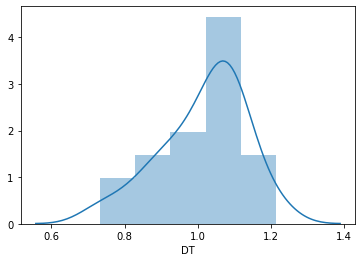

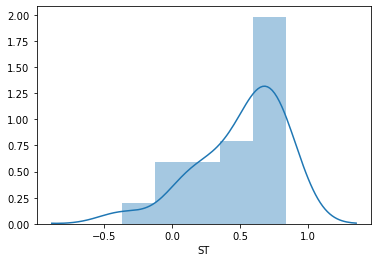

In [33]:
data2= data1
data2['ST']=np.log(data['ST'])
sns.distplot(data2['DT'])
plt.show()
sns.distplot(data2['ST'])
plt.show()

In [34]:
model4= smf.ols('ST~DT',data= data2).fit()

In [35]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     77.21
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           4.05e-08
Time:                        13:07:20   Log-Likelihood:                 11.820
No. Observations:                  21   AIC:                            -19.64
Df Residuals:                      19   BIC:                            -17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9199      0.278     -6.913      0.000      -2.501      -1.339
DT             2.3908      0.272      8.787      0.000       1.821       2.960
==============================================================================
Omnibus:                        1.317   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                0.968
Skew:                          -0.237   Prob(JB):                        0.616
Kurtosis:                       2.061   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""